In [1]:
import pandas as pd
df=pd.read_csv("Retail_Transactions_2000.csv")

In [2]:
df.size

22000

In [3]:
df.columns

Index(['TransactionID', 'CustomerID', 'Gender', 'Age', 'City',
       'ProductCategory', 'Quantity', 'Price', 'PurchaseDate', 'PaymentMode',
       'TotalAmount'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [4]:
df.shape

(2000, 11)

In [5]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [9]:
invalid_age = df[df["Age"] < 0]
print("Invalid Age:", len(invalid_age))

Invalid Age: 0


In [10]:
invalid_quantity = df[df["Quantity"] <= 0]
print("Invalid Quantity:", len(invalid_quantity))

Invalid Quantity: 0


In [11]:
invalid_price = df[df["Price"] < 0]
print("Invalid Price :", len(invalid_price))

Invalid Price : 0


In [12]:
invalid_total = df[df["TotalAmount"] <= 0]
print("Invalid TotalAmount:", len(invalid_total))

Invalid TotalAmount: 0


In [16]:
missing_data= df.dropna(subset=["TransactionID", "ProductCategory"])
print("Before:", len(df))
print("After:", len(missing_data))

Before: 2000
After: 2000


In [22]:
for i in ['Age','Quantity','Price','TotalAmount']:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  outlier=((df[i]<lower) | (df[i]>upper)).sum()
  print(f'{i}: {outlier} outliers')

Age: 0 outliers
Quantity: 0 outliers
Price: 0 outliers
TotalAmount: 26 outliers


In [25]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors="coerce")
df["Month"] = df["PurchaseDate"].dt.month_name()     
df["DayOfWeek"] = df["PurchaseDate"].dt.day_name()  

print(df[["PurchaseDate", "Month", "DayOfWeek"]].head(10))


  PurchaseDate      Month  DayOfWeek
0   2023-03-15      March  Wednesday
1   2023-01-22    January     Sunday
2   2023-04-18      April    Tuesday
3   2023-08-09     August  Wednesday
4   2023-09-23  September   Saturday
5   2023-05-23        May    Tuesday
6   2023-10-22    October     Sunday
7   2023-11-12   November     Sunday
8   2023-06-10       June   Saturday
9   2023-02-20   February     Monday


In [ ]:
bins = [0, 17, 25, 40, 60, 120]   
labels = ["<18", "18-25", "26-40", "41-60", "60+"] 
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

print(df[["Age", "AgeGroup"]].head(10))

   Age AgeGroup
0   33    26-40
1   20    18-25
2   47    41-60
3   21    18-25
4   41    41-60
5   63      60+
6   30    26-40
7   35    26-40
8   41    41-60
9   70      60+


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["Gender_Encoded"] = label_encoder.fit_transform(df["Gender"])
df["City_Encoded"] = label_encoder.fit_transform(df["City"])
print(df[["Gender", "Gender_Encoded", "City", "City_Encoded"]].head(10))


   Gender  Gender_Encoded       City  City_Encoded
0  Female               0  Bengaluru             1
1   Other               2       Pune             9
2   Other               2       Pune             9
3   Other               2  Hyderabad             4
4  Female               0    Chennai             2
5    Male               1      Delhi             3
6   Other               2       Pune             9
7  Female               0  Hyderabad             4
8  Female               0     Jaipur             5
9    Male               1    Lucknow             7


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["ProductCategory_Encoded"] = le.fit_transform(df["ProductCategory"])
print(df[["ProductCategory", "ProductCategory_Encoded"]].head(10))


  ProductCategory  ProductCategory_Encoded
0         Fashion                        3
1           Books                        1
2       Furniture                        4
3       Groceries                        5
4          Sports                        6
5       Furniture                        4
6     Electronics                        2
7           Books                        1
8           Books                        1
9       Groceries                        5


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["PaymentMode_Encoded"] = le.fit_transform(df["PaymentMode"])
print(df[["PaymentMode", "PaymentMode_Encoded"]].head(10))


  PaymentMode  PaymentMode_Encoded
0        Cash                    1
1        Card                    0
2      Wallet                    3
3        Cash                    1
4      Wallet                    3
5        Card                    0
6        Card                    0
7        Cash                    1
8        Cash                    1
9         UPI                    2


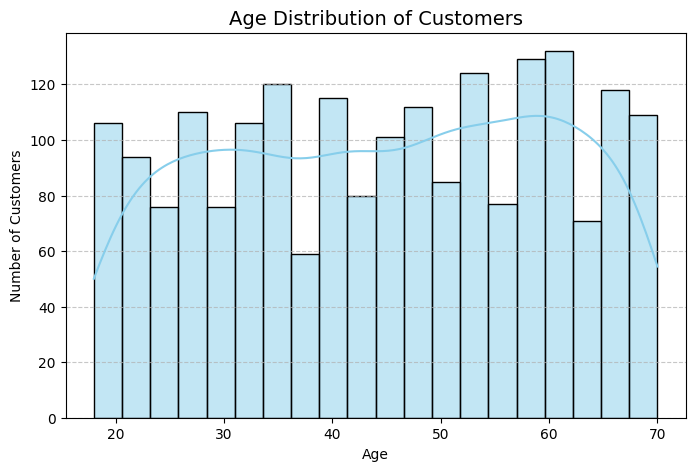

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


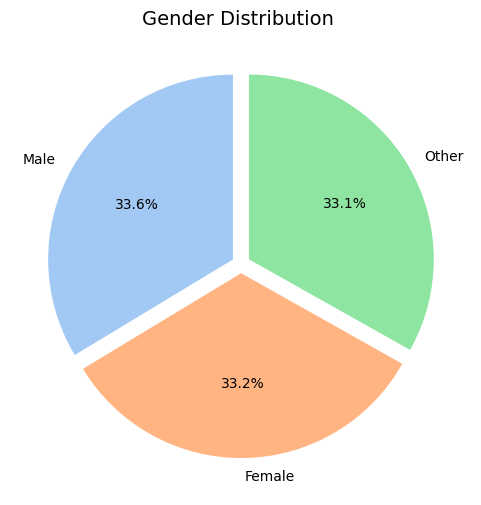

In [42]:
gender_counts = df["Gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", 
        startangle=90, colors=sns.color_palette("pastel"), explode=(0.05,0.05,0.05))

plt.title("Gender Distribution ", fontsize=14)
plt.show()


C:\Users\91958\AppData\Local\Temp\ipykernel_19628\1376653974.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_customers.values, y=city_customers.index, palette="pastel", edgecolor="black")


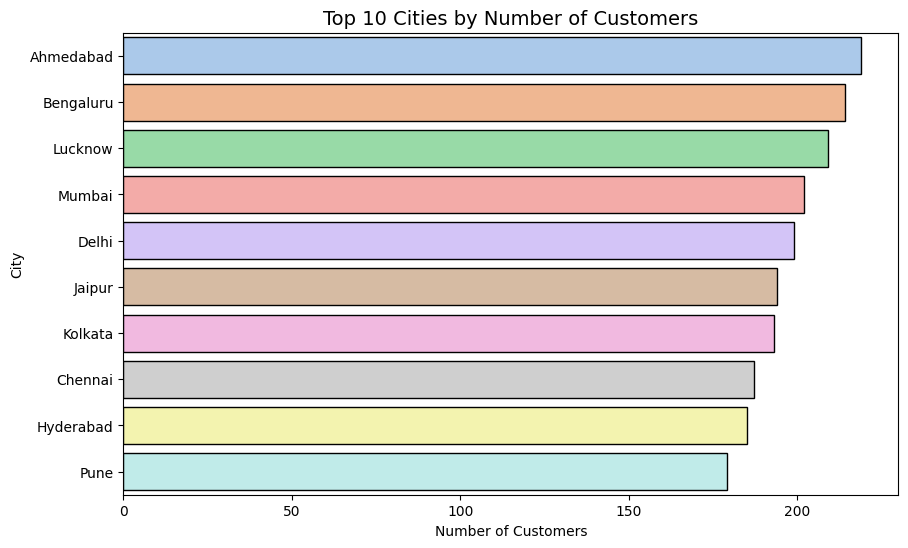

In [ ]:
city_customers = df.groupby("City")["CustomerID"].nunique().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=city_customers.values, y=city_customers.index, palette="pastel", edgecolor="black")

plt.title("Top 10 Cities by Number of Customers", fontsize=14)
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.show()


C:\Users\91958\AppData\Local\Temp\ipykernel_19628\452008499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="pastel", edgecolor="black")


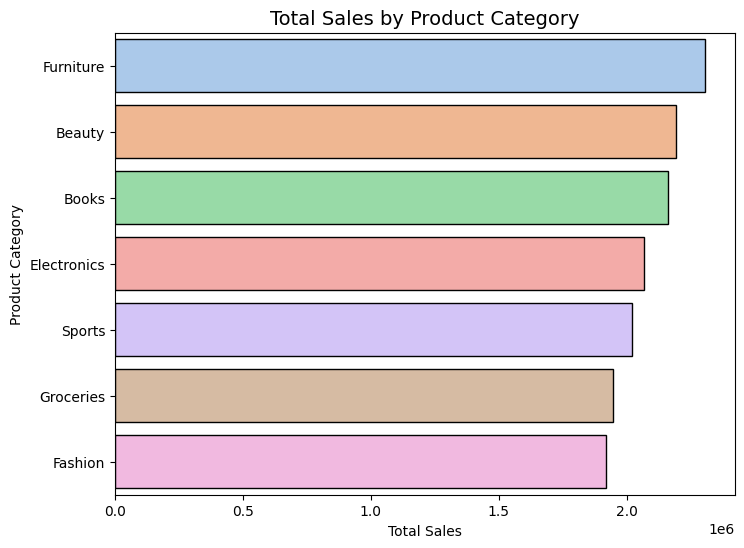

In [45]:
sales_by_category = df.groupby("ProductCategory")["TotalAmount"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="pastel", edgecolor="black")

plt.title("Total Sales by Product Category", fontsize=14)
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()


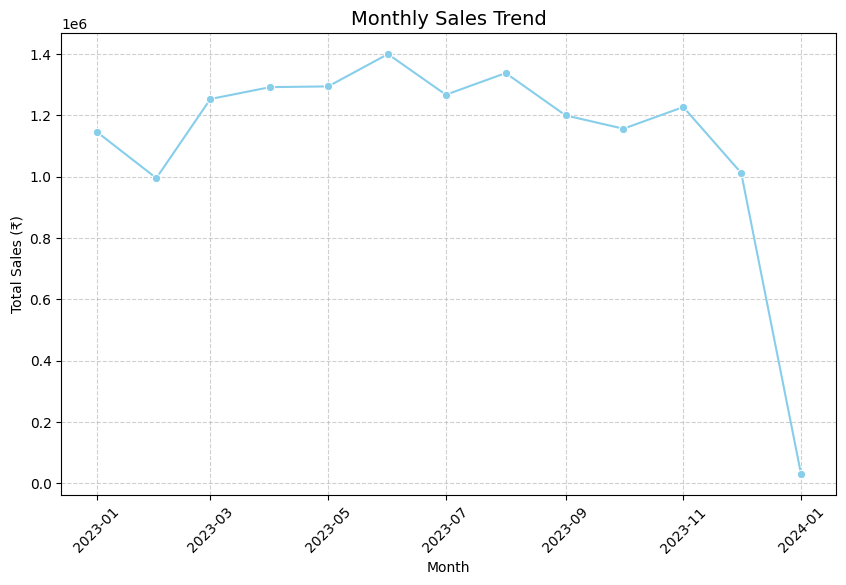

In [ ]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"], errors="coerce")
monthly_sales = df.groupby(df["PurchaseDate"].dt.to_period("M"))["TotalAmount"].sum().reset_index()
monthly_sales["PurchaseDate"] = monthly_sales["PurchaseDate"].dt.to_timestamp()
plt.figure(figsize=(10,6))
sns.lineplot(x="PurchaseDate", y="TotalAmount", data=monthly_sales, marker="o", color="skyblue")

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(linestyle="--", alpha=0.6)
plt.xticks(rotation=45)
plt.show()


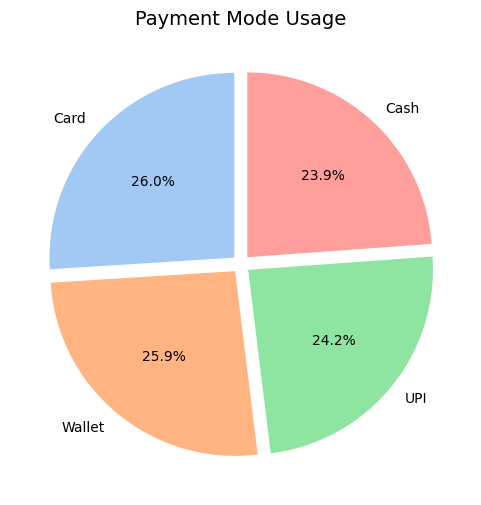

In [47]:
payment_counts = df["PaymentMode"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%",
        startangle=90, colors=sns.color_palette("pastel"), explode=[0.05]*len(payment_counts))

plt.title("Payment Mode Usage", fontsize=14)
plt.show()


C:\Users\91958\AppData\Local\Temp\ipykernel_19628\4053507531.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend = df.groupby("AgeGroup").apply(lambda x: x["TotalAmount"].sum() / x["CustomerID"].nunique())
C:\Users\91958\AppData\Local\Temp\ipykernel_19628\4053507531.py:4: RuntimeWarning: invalid value encountered in scalar divide
  avg_spend = df.groupby("AgeGroup").apply(lambda x: x["TotalAmount"].sum() / x["CustomerID"].nunique())
C:\Users\91958\AppData\Local\Temp\ipykernel_19628\4053507531.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns

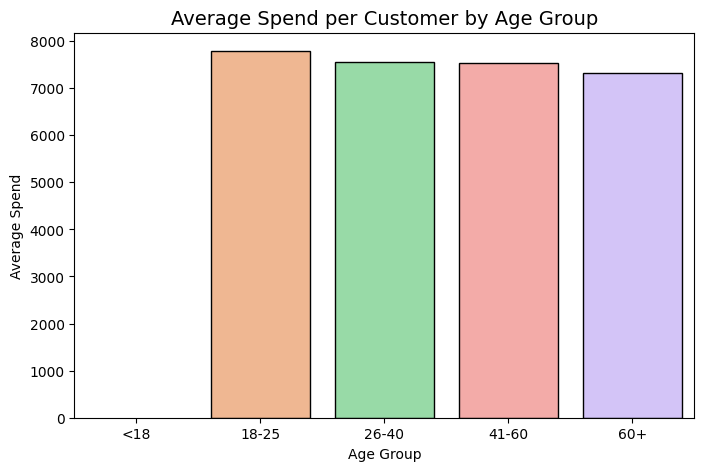

In [50]:
bins = [0, 17, 25, 40, 60, 120]
labels = ["<18", "18-25", "26-40", "41-60", "60+"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)
avg_spend = df.groupby("AgeGroup").apply(lambda x: x["TotalAmount"].sum() / x["CustomerID"].nunique())
avg_spend = avg_spend.reset_index(name="AvgSpend")
plt.figure(figsize=(8,5))
sns.barplot(x="AgeGroup", y="AvgSpend", data=avg_spend, palette="pastel", edgecolor="black")

plt.title("Average Spend per Customer by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.show()


C:\Users\91958\AppData\Local\Temp\ipykernel_19628\4010774095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TotalAmount", y="City", data=city_revenue, palette="pastel", edgecolor="black")


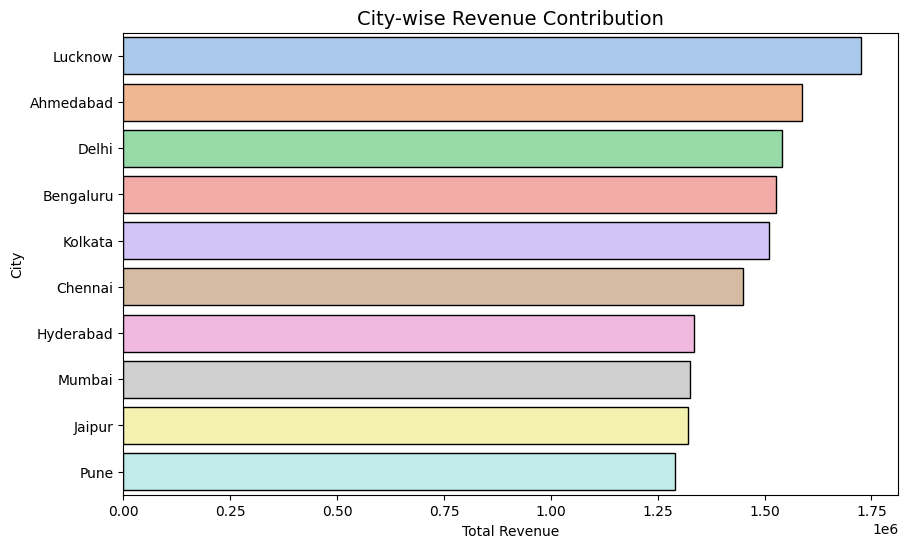

In [52]:
city_revenue = df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x="TotalAmount", y="City", data=city_revenue, palette="pastel", edgecolor="black")

plt.title("City-wise Revenue Contribution", fontsize=14)
plt.xlabel("Total Revenue")
plt.ylabel("City")
plt.show()


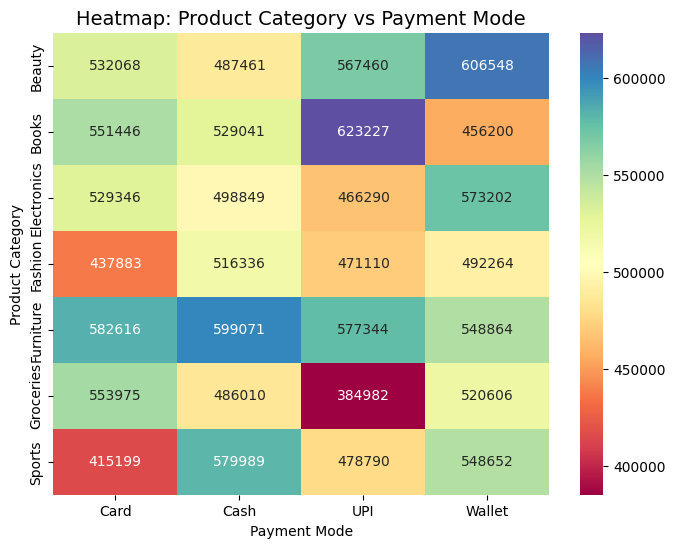

In [58]:
heatmap_data = df.pivot_table(values="TotalAmount", 
                              index="ProductCategory", 
                              columns="PaymentMode", 
                              aggfunc="sum", 
                              fill_value=0)
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Spectral")

plt.title("Heatmap: Product Category vs Payment Mode", fontsize=14)
plt.xlabel("Payment Mode")
plt.ylabel("Product Category")
plt.show()
